# <span style="color: #007BFF; font-size: 24px; font-weight: bold;"> Bootcamp Data Science & Analítica de Datos - RMS TITANIC </span>
<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.6; color: #333;">

### **Algoritmos de Clasificación**

Hoy vamos a adentrarnos en una de las áreas más fundamentales y poderosas del aprendizaje automático: la clasificación. Imaginen por un momento que son los responsables de tomar decisiones críticas en una empresa, donde deben determinar si un cliente se quedará o abandonará el servicio, si un correo electrónico es spam o no, o incluso si una transacción es fraudulenta. Todas estas decisiones dependen de la capacidad para clasificar correctamente la información que tienen a su disposición.

En este notebook, vamos a explorar cómo los algoritmos de clasificación pueden ayudarnos a resolver problemas complejos al dividir nuestros datos en diferentes categorías o clases. La clasificación es como ser un detective de datos, donde debemos analizar las pistas (características) y llegar a una conclusión sobre a qué grupo pertenece cada caso.

No solo aprenderemos los conceptos clave detrás de la clasificación, sino que también nos ensuciaremos las manos con código, aplicando técnicas prácticas para entrenar, evaluar y mejorar modelos de clasificación. Desde los básicos como la regresión logística, hasta algoritmos más avanzados como los bosques aleatorios, veremos cómo cada técnica tiene su propia fortaleza en función del problema que intentamos resolver.

<figure>
<center>
<img src='https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Images/titanic_classification.png' width="750" height="550" />
<figcaption></figcaption></center>
</figure>

### **Introducción a la Clasificación Binaria: El Desafío del Titanic**

¡Bienvenidos a este módulo sobre clasificación binaria! En esta sección, nos sumergiremos en uno de los conjuntos de datos más famosos en ciencia de datos: el conjunto de datos del Titanic. Este conjunto no solo ofrece una visión histórica de los trágicos eventos del hundimiento del Titanic, sino que también proporciona un campo de entrenamiento rico para aprender y aplicar técnicas de aprendizaje automático.

#### El Conjunto de Datos del Titanic

En 1912, el RMS Titanic chocó contra un iceberg y se hundió en su viaje inaugural, lo que resultó en la pérdida de más de 1,500 vidas. El conjunto de datos del Titanic es una colección de información sobre los pasajeros de ese fatídico viaje, incluyendo características como edad, sexo, clase del pasajero y si sobrevivieron o no.

#### ¿Por Qué Clasificación Binaria?

La clasificación binaria es un tipo de tarea de aprendizaje automático en la que el objetivo es predecir uno de dos resultados posibles. En el conjunto de datos del Titanic, nuestro objetivo es predecir si un pasajero sobrevivió o no. Este es un ejemplo clásico de un problema de clasificación binaria, donde la variable objetivo es categórica con dos clases: "Sobrevivió" y "No Sobrevivió."

<figure>
<center>
<img src='https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Images/imagen_clasificacion.png' width="550" height="300" />
<figcaption></figcaption></center>
</figure>

#### ¿Qué Haremos?

En este cuaderno, vamos a:

1. **Explorar los Datos**: Entender las características disponibles y su importancia en la predicción de la supervivencia.
2. **Preprocesar los Datos**: Limpiar y preparar los datos para el modelado, manejando valores faltantes y codificando variables categóricas.
3. **Construir Modelos de Clasificación**: Aplicar varios algoritmos de clasificación binaria para predecir los resultados de supervivencia.
4. **Evaluar el Desempeño del Modelo**: Utilizar métricas como precisión, exactitud, recuperación y curvas ROC para evaluar nuestros modelos.

#### La Importancia de Este Desafío

Predecir la supervivencia en el Titanic no es solo un ejercicio de ciencia de datos; es una demostración práctica de cómo los algoritmos de clasificación pueden aplicarse a problemas del mundo real. Al trabajar en este desafío, adquirirás experiencia valiosa en el manejo de datos, la construcción de modelos y la realización de predicciones basadas en datos.

¡Vamos a embarcarnos en este viaje para desentrañar los secretos del conjunto de datos del Titanic y mejorar nuestras habilidades en clasificación binaria!

In [1]:
# importamos librerias para procesamiero de datos y gráficas
import os
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# importamos librerias para modelos de clasificación 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, precision_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_0 = pd.read_csv('https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Inputs/train.csv')

Presentamos las dimensiones del Dataframe para darnos una idea de la cantidad de datos con los que vamos a trabajar:

In [2]:
# Dimensiones del Dataframe
print(df_0.shape)
df_0.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Identificamos que tenemos 891 observaciones con 12 variables.

Vamos a validar la cantidad de nulos por variable, cantidad de valores únicos por variable y tipos de variables: 

In [3]:
# Crear un DataFrame con el resumen
summary_df = pd.DataFrame({
    'Valores Nulos': df_0.isnull().sum(),
    'Valores Únicos': df_0.nunique(),
    'Tipo de Dato': df_0.dtypes
})

# Mostrar la tabla
print(summary_df)

             Valores Nulos  Valores Únicos Tipo de Dato
PassengerId              0             891        int64
Survived                 0               2        int64
Pclass                   0               3        int64
Name                     0             891       object
Sex                      0               2       object
Age                    177              88      float64
SibSp                    0               7        int64
Parch                    0               7        int64
Ticket                   0             681       object
Fare                     0             248      float64
Cabin                  687             147       object
Embarked                 2               3       object


### Reemplazo de Valores Nulos en Columnas de Tipo Objeto

El siguiente código tiene como objetivo reemplazar los valores nulos en columnas específicas de un DataFrame con una cadena que indica que la información está ausente. En este caso, se utiliza la cadena `'Sin_info'` para reemplazar los valores nulos en las columnas `'Cabin'` y `'Embarked'`. Primero, se define una lista de columnas en `columns_to_fill_with_empty_string` que contiene los nombres de las columnas que se desean modificar. Luego, se usa el método `fillna()` para reemplazar los valores nulos en esas columnas con la cadena `'Sin_info'`. Este enfoque es útil para manejar valores nulos en datos categóricos y permite realizar análisis posteriores sin la interferencia de valores nulos.

In [4]:
# Definir las columnas que se desea rellenar con una cadena vacía
columns_to_fill_with_empty_string = ['Cabin', 'Embarked']

# Reemplazar los valores nulos en las columnas especificadas con la cadena 'Sin_info'
df_0[columns_to_fill_with_empty_string] = df_0[columns_to_fill_with_empty_string].fillna('Sin_info')

### Reemplazo de Valores Nulos en la Columna 'Age' con la Moda

El siguiente código calcula la moda de la columna `'Age'` en un DataFrame y utiliza este valor para reemplazar los valores nulos en la misma columna. Primero, se calcula la moda de la columna `'Age'` utilizando el método `mode()`, que devuelve una Serie con la moda de la columna. Se selecciona el primer valor de esta Serie (el valor más frecuente) usando `[0]`. Luego, se utiliza el método `fillna()` para reemplazar los valores nulos en la columna `'Age'` con la moda calculada. El parámetro `inplace=True` asegura que la operación se realice directamente en el DataFrame sin necesidad de asignar el resultado a una nueva variable.


In [5]:
# Calcular la moda de la columna 'Age' por cada categoría de 'Sex'
age_mode_male = df_0[df_0['Sex'] == 'male']['Age'].mode()[0]
age_mode_female = df_0[df_0['Sex'] == 'female']['Age'].mode()[0]

# Crear una función para aplicar la moda correcta según el sexo
def fill_age_by_sex(row):
    if pd.isnull(row['Age']):
        if row['Sex'] == 'male':
            return age_mode_male
        elif row['Sex'] == 'female':
            return age_mode_female
    else:
        return row['Age']

# Aplicar la función para rellenar los valores faltantes en 'Age'
df_0['Age'] = df_0.apply(fill_age_by_sex, axis=1)

In [6]:
# Verificar que ya no hay valores nulos
print(df_0.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### Conteo y Proporción de la Variable 'Survived'

El siguiente código muestra cómo contar los valores de la variable `'Survived'` en el DataFrame, lo que es crucial para entender la distribución de la variable objetivo en un problema de clasificación binaria.


In [7]:
# Conteo de la variable 'Churn Value'
print(df_0["Survived"].value_counts())
print(df_0["Survived"].value_counts(10))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


Esto es importante para entender cuántas instancias hay de cada clase en la variable objetivo, lo que ayuda a identificar el balance entre las clases. En problemas de clasificación binaria, es fundamental conocer la proporción de cada clase para ajustar y evaluar el rendimiento del modelo adecuadamente. El segundo comando incluye el parámetro normalize=True en value_counts() para calcular la proporción de cada clase en lugar del conteo absoluto. Esto proporciona una perspectiva sobre la distribución relativa de las clases y es útil para identificar problemas de desequilibrio de clases. Un desequilibrio significativo entre las clases puede afectar el rendimiento del modelo y puede requerir técnicas de manejo de desequilibrio como el submuestreo o sobremuestreo.

### **Evaluación de Métricas: Precision y Recall**

En el contexto de la clasificación binaria, como el análisis del conjunto de datos del Titanic, es crucial evaluar cómo de bien está funcionando nuestro modelo al identificar las instancias correctas. En este ejercicio, estamos particularmente interesados en la métrica de **Recall**. 

**Recall** es una métrica que indica qué tan bien nuestro modelo está capturando todas las instancias de la clase positiva. En el caso del Titanic, esta clase positiva representa a los pasajeros que sobrevivieron. Optimizar el **Recall** es importante porque queremos identificar el mayor número posible de pasajeros que sobrevivieron, lo cual es fundamental para evaluar cómo el modelo puede mejorar la identificación de sobrevivientes.

A continuación, se detallan dos métricas importantes:

#### **Precision**

<figure>
<center>
<img src='https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Images/matriz_confusion.png' width="400" height="350" />
<figcaption></figcaption></center>
</figure>

* **Precision:** ¿De las predicciones positivas de mi algoritmo, cuántas son realmente positivas? En el contexto del Titanic, ¿de todas las veces que el modelo predice que un pasajero sobrevivirá, cuántos realmente sobreviven?

$$ Precision =  \frac{TP}{TP+FP}$$

$$ Precision =  \frac{80}{80+10}$$

$$ Precision =  0.89$$

Precision se enfoca en la exactitud de las predicciones positivas del modelo, asegurando que las predicciones de supervivencia sean correctas. Por ejemplo, si el modelo predice que 90 pasajeros sobrevivirán y 80 realmente sobreviven (Verdaderos Positivos, TP), pero 10 no sobreviven (Falsos Positivos, FP), la precisión es del 89%.

* **Recall (Sensibilidad):** ¿De todos los casos actuales, cuántos logra identificar mi algoritmo? De todos los pasajeros que realmente sobrevivieron, ¿cuántos logra identificar correctamente mi modelo?

$$ Recall =  \frac{TP}{TP+FN}$$

$$ Recall =  \frac{80}{80+20}$$

$$ Recall =  0.80$$

Recall mide qué tan bien el modelo detecta a los pasajeros que realmente sobrevivieron. Un alto Recall significa que el modelo está capturando la mayoría de los pasajeros sobrevivientes, aunque podría incluir algunos que no lo son (más falsos positivos). Por ejemplo, si en realidad 100 pasajeros sobrevivieron y el modelo identifica correctamente a 80 de ellos (Verdaderos Positivos, TP), pero no identifica a 20 que también sobrevivieron (Falsos Negativos, FN), el Recall sería del 80%.

En nuestro análisis del Titanic, nos enfocamos en optimizar el **Recall** para asegurarnos de identificar la mayor cantidad posible de pasajeros que sobrevivieron. Esto es especialmente importante en escenarios donde queremos minimizar el riesgo de pasar por alto a los pasajeros que sobrevivieron.

### **Identificación y Codificación de Características Categóricas**

El siguiente código identifica las características numéricas y categóricas en el conjunto de datos y luego codifica las variables categóricas utilizando un **Label Encoder**. En primer lugar, se seleccionan las características numéricas y categóricas de `df_0` mediante el uso de `select_dtypes`, asignándolas a las listas `num_features` y `cat_features`, respectivamente. A continuación, se utiliza un `Label Encoder` para convertir las variables categóricas en valores numéricos. Esto es crucial porque los algoritmos de aprendizaje automático generalmente requieren entradas numéricas. El `Label Encoder` asigna un valor numérico único a cada categoría dentro de una variable categórica. A diferencia del **One-Hot Encoding**, que crea una columna binaria separada para cada categoría, el `Label Encoder` convierte cada categoría en un solo valor numérico, lo cual es útil cuando la variable categórica tiene un orden implícito. El diccionario `label_encoders` almacena cada `Label Encoder` utilizado, permitiendo decodificar las variables si es necesario.


In [8]:
df_0.Embarked.value_counts()

S           644
C           168
Q            77
Sin_info      2
Name: Embarked, dtype: int64

In [9]:
# Identificar características numéricas y categóricas
num_features = df_0.select_dtypes(include=['int64', 'float64']).columns.tolist()
#cat_features = df_0.select_dtypes(include=['object']).columns.tolist()
cat_features = ['Sex','Embarked','Ticket','Cabin']

# Codificar variables categóricas
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    df_0[col] = le.fit_transform(df_0[col].astype(str))
    label_encoders[col] = le

In [10]:
df_0.Embarked.value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

## **Conjunto de Entrenamiento y Prueba**
### **Imagina que tienes una base de datos de clientes**


<figure>
<center>
<img src='https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Images/Train_test.png' width="750" height="250" />
<figcaption></figcaption></center>
</figure>

 1. **Clientes (Base de Datos)**: Es como una lista de todos tus clientes. Cada cliente tiene información sobre si han cancelado el servicio (churn) o no.

 2. **Dividir la base de datos (Entrenamiento y Prueba)**:
 * Entrenamiento (X_train, y_train): Imagina que tomas una parte de esta lista para entrenar tu modelo. Usamos esta parte para enseñar a nuestro modelo cómo es un cliente que se queda y uno que se va. 
 * Prueba (X_test, y_test): Guardamos otra parte de la lista para probar cómo lo ha aprendido el modelo. Esto nos ayuda a ver si el modelo hace un buen trabajo prediciendo qué clientes podrían cancelar el servicio en el futuro.

**¿Cómo funciona?**

* Entrenar: Usamos X_train (información de clientes) y y_train (si cancelaron o no) para enseñar al modelo. Es como cuando practicas para un examen usando algunos ejercicios.

* Probar: Luego, usamos X_test (nueva información de clientes) y y_test (resultados reales si cancelaron o no) para ver si el modelo predice correctamente. Es como tomar el examen real después de haber practicado.

En resumen, entrenar es como estudiar, y probar es como hacer el examen para ver si aprendiste bien.

In [11]:
# Separar características y variable objetivo
X = df_0.drop(columns=['Survived','PassengerId','Name','Ticket']) 
y = df_0['Survived']

In [12]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### **Normalización/Estandarización de Variables Numéricas**

<figure>
<center>
<img src='https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Images/estandarizacion.png' width="450" height="250" />
<figcaption></figcaption></center>
</figure>


El siguiente código se utiliza para normalizar las características numéricas en los conjuntos de datos de entrenamiento y prueba. La normalización es un paso crucial en el preprocesamiento de datos, ya que ajusta los valores numéricos a una escala común sin distorsionar las diferencias en los rangos de valores. Aquí se emplea el método **StandardScaler** del paquete `sklearn`, que estandariza las características restando la media y dividiendo por la desviación estándar. Esto da como resultado una distribución con una media de 0 y una desviación estándar de 1. Primero, se ajusta el `StandardScaler` a los datos de entrenamiento (`X_train`) y luego se aplica tanto a `X_train` como a `X_test`. Esto asegura que las características numéricas tengan una escala uniforme, lo cual es esencial para muchos algoritmos de aprendizaje automático que son sensibles a las diferencias en la escala de los datos.


In [13]:
# Slicing the list to avoid the first two values
num_features_cont = ['Age', 'Fare']

In [14]:
# Media y Desviación Estandar
print (round(X_train["Fare"].mean(),2))
print (round(X_train["Fare"].std(),2))

32.39
52.22


In [15]:
# Normalizar características numéricas
scaler = StandardScaler()
X_train[num_features_cont] = scaler.fit_transform(X_train[num_features_cont])
X_test[num_features_cont] = scaler.transform(X_test[num_features_cont])

/BOBJ/home/jmpaibaam/miniconda3/envs/legacy/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/BOBJ/home/jmpaibaam/miniconda3/envs/legacy/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [16]:
# Media y Desviación Estandar
print (round(X_train["Fare"].mean(),2))
print (round(X_train["Fare"].std(),2))

-0.0
1.0


# **Árboles de Decisión en Problemas de Clasificación Binaria**

<figure>
<center>
<img src='https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Images/decision_tree.png' width="600" height="300" />
<figcaption></figcaption></center>
</figure>

Un **árbol de decisión** es un modelo de aprendizaje automático utilizado para tareas de clasificación y regresión. En problemas de **clasificación binaria**, se usa para predecir a qué una de dos clases pertenece una muestra.

## ¿Cómo Funciona?

1. **División de Datos**: El árbol de decisión divide los datos en diferentes nodos basados en características específicas. Cada nodo interno representa una pregunta o prueba sobre una característica, y cada rama representa el resultado de la prueba.

2. **Nodos**:
   - **Nodos Internos**: Representan pruebas en una característica. Cada nodo divide los datos en función del valor de una característica.
   - **Nodos de Hoja**: Representan las clases finales en las que se clasifica una muestra. Estos nodos contienen la predicción final del modelo.

3. **Criterios de Divisiones**:
   - **Impureza de Gini**: Mide cuán mezcladas están las clases en el nodo. Un nodo con baja impureza de Gini es más puro.
   - **Entropía**: Mide la cantidad de incertidumbre o desorden en los datos. La entropía baja indica un nodo más puro.

## Ventajas
- **Interpretabilidad**: Los árboles de decisión son fáciles de interpretar y visualizar.
- **No Requiere Normalización de Datos**: No es necesario normalizar o estandarizar los datos.

## Desventajas
- **Sobreajuste**: Los árboles de decisión pueden sobreajustar los datos de entrenamiento si no se podan adecuadamente.
- **Sensibilidad a Pequeñas Variaciones**: Pueden ser inestables con pequeñas variaciones en los datos.

Un árbol de decisión para clasificación binaria puede ser una herramienta poderosa para predecir la pertenencia a dos clases, proporcionando decisiones claras basadas en las características de los datos.


## **Entrenamiendo del Modelo**

In [17]:
# Entrenar el árbol de decisión con un límite de profundidad
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

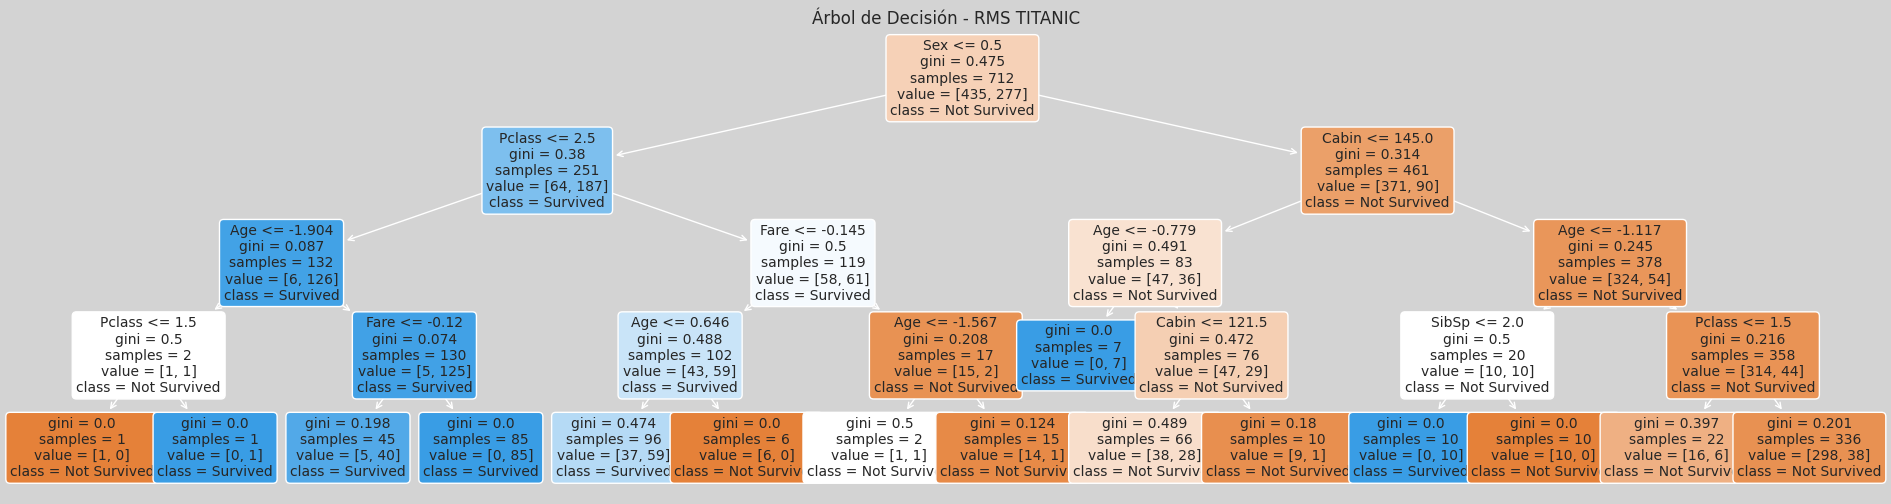

In [18]:
# Configurar el tamaño de la figura
plt.figure(figsize=(24, 6))
plt.gcf().patch.set_facecolor('lightgrey')

# Visualizar el árbol de decisión
plot_tree(clf, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=['Not Survived', 'Survived'], 
          rounded=True, 
          fontsize=10)  

plt.title('Árbol de Decisión - RMS TITANIC')
plt.show()

**Gini:** Esto representa la impureza de Gini del nodo. Mide cuán mezcladas están las clases en el nodo. Un valor más bajo de Gini indica un nodo más puro, lo que significa que la mayoría de las muestras pertenecen a una sola clase.

**Muestras:** Este es el número de muestras (puntos de datos) que llegan a este nodo. Te dice cuántos puntos de datos se usan para tomar la decisión en este nodo.

**Valor:** Muestra el número de muestras para cada clase dentro del nodo. Generalmente se muestra como un arreglo donde cada elemento representa el conteo de muestras para cada clase. Para clasificación binaria, podrías ver algo como [100, 50], donde 100 es el conteo para la clase 0 y 50 es para la clase 1.

**Clase:** Esta es la clase a la que se clasifica el nodo. Para cada nodo, muestra la clase con el mayor número de muestras. En la clasificación binaria, es la clase con la mayoría de las muestras en ese nodo.


In [19]:
# Predicciones
y_pred_train_dt = clf.predict(X_train)
y_prob_train_dt = clf.predict_proba(X_train)[:, 1]
y_pred_test_dt = clf.predict(X_test)

In [20]:
def plot_confusion_matrices_and_reports(y_train_pred, y_test_pred, y_train_true, y_test_true):
    
    # Evaluation for the training set
    train_accuracy = accuracy_score(y_train_true, y_train_pred)
    train_auc = roc_auc_score(y_train_true, y_train_pred)
    train_report = classification_report(y_train_true, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)

    # Evaluation for the test set
    test_accuracy = accuracy_score(y_test_true, y_test_pred)
    test_auc = roc_auc_score(y_test_true, y_test_pred)
    test_report = classification_report(y_test_true, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test_true, y_test_pred)

    def plot_confusion_matrix(cm, report, title='Confusion Matrix', cmap=plt.cm.Blues):
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                    xticklabels=['Class 0', 'Class 1'], 
                    yticklabels=['Class 0', 'Class 1'], ax=axes[0])
        axes[0].set_title(title)
        axes[0].set_xlabel('Predicted')
        axes[0].set_ylabel('Actual')

        # Plot classification report
        axes[1].text(0.5, 0.5, report, ha='center', va='center', fontsize=10, 
                     bbox=dict(facecolor='white', alpha=0.7), multialignment='right')
        axes[1].set_title('Métricas de Clasificación')
        axes[1].axis('off')  # Turn off the axis

        plt.tight_layout()
        plt.show()

    # Plot for training set
    plot_confusion_matrix(train_conf_matrix, train_report, title='Conjunto Entrenamiento', cmap=plt.cm.Blues)

    # Plot for test set
    plot_confusion_matrix(test_conf_matrix, test_report, title='Conjunto de Prueba', cmap=plt.cm.Greens)

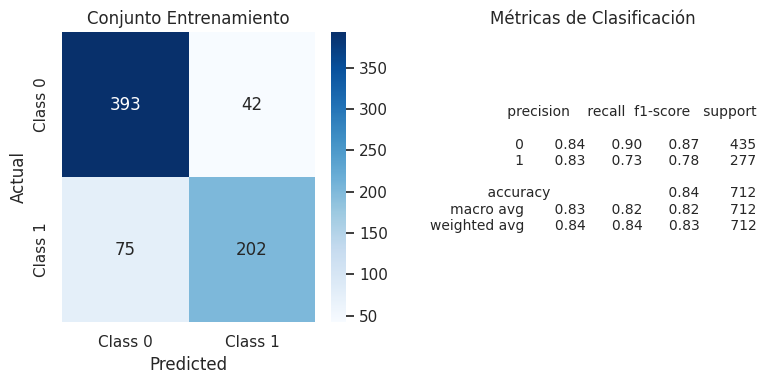

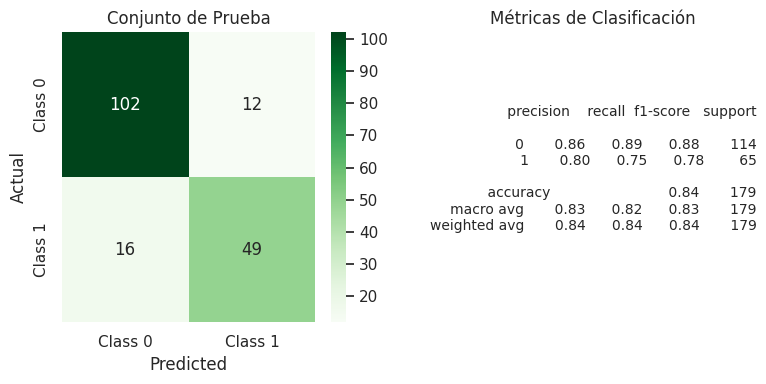

In [21]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrices_and_reports(y_pred_train_dt, y_pred_test_dt, y_train, y_test)    

In [22]:
def compute_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred, y_train_pred_proba):
    
    # Accuracy for training and test set
    accuracy_train = round(100.0 * accuracy_score(y_train_true, y_train_pred), 2)
    accuracy_test = round(100.0 * accuracy_score(y_test_true, y_test_pred), 2)
    
    # AUC for the training set
    #auc = round(roc_auc_score(y_train_true, y_train_pred_proba), 3)
    
    # Compute the classification report
    report = classification_report(y_test_true, y_test_pred, output_dict=True)
    
    # Extract precision, recall, F1 score for class 1
    precision_class_1 = round(report['1']['precision'], 3)
    recall_class_1 = round(report['1']['recall'], 3)
    f1_class_1 = round(report['1']['f1-score'], 3)
    
    return {
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
       # 'auc': auc,
        'precision_class_1': precision_class_1,
        'recall_class_1': recall_class_1,
        'f1_class_1': f1_class_1
    }

In [23]:
metrics_dt = compute_metrics(y_train, y_pred_train_dt, y_test, y_pred_test_dt, y_prob_train_dt)

In [24]:
metrics_dt

{'accuracy_train': 83.57,
 'accuracy_test': 84.36,
 'precision_class_1': 0.803,
 'recall_class_1': 0.754,
 'f1_class_1': 0.778}

## **Introducción a la Regresión Logística**

<figure>
<center>
<img src='https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Images/logistic_regression.png' width="800" height="400" />
<figcaption></figcaption></center>
</figure>

La **regresión logística** es un modelo estadístico utilizado para predecir la probabilidad de una variable dependiente categórica, generalmente binaria. A diferencia de la regresión lineal, que se utiliza para variables continuas, la regresión logística estima la probabilidad de que un evento ocurra mediante una función logística, que transforma la salida lineal del modelo en una probabilidad entre 0 y 1. Esta técnica es ampliamente utilizada en problemas de clasificación, como la detección de fraude, diagnóstico médico y análisis de mercado.

En el contexto de aprendizaje automático, la regresión logística es valorada por su simplicidad y eficacia. Aunque se basa en un supuesto de relación lineal entre las características y la probabilidad de la clase positiva, su capacidad para manejar variables independientes e interpretar la importancia de las características la hace útil en una variedad de aplicaciones. La salida del modelo puede ser interpretada como una probabilidad, lo que facilita la toma de decisiones basadas en umbrales de probabilidad ajustables.


In [25]:
# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [26]:
# Predicciones
y_pred_train_lr = model.predict(X_train)
y_prob_train_lr = model.predict_proba(X_train)[:, 1]
y_pred_test_lr = model.predict(X_test)

In [27]:
# Add a constant to the model (intercept)
X = sm.add_constant(X_train)
model = sm.Logit(y_train, X)
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.453117
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Thu, 29 Aug 2024   Pseudo R-squ.:                  0.3220
Time:                        08:32:33   Log-Likelihood:                -322.62
converged:                       True   LL-Null:                       -475.84
Covariance Type:            nonrobust   LLR p-value:                 1.746e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2018      0.541      7.773      0.000       3.142       5.261
Pclass        -1.0088      0.

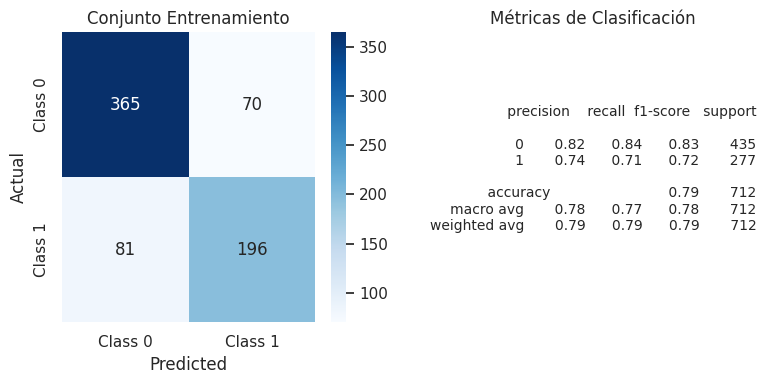

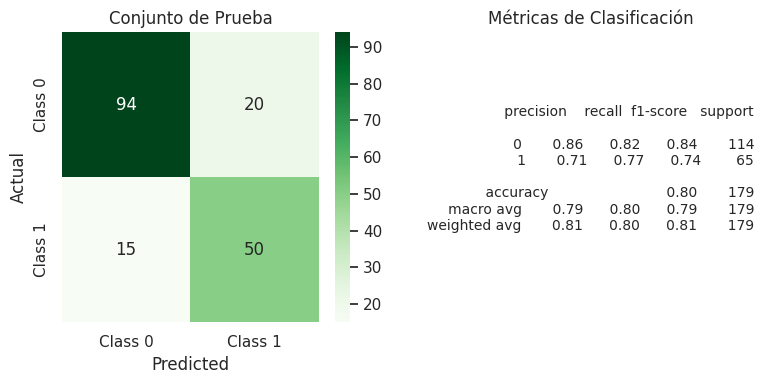

In [28]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrices_and_reports(y_pred_train_lr, y_pred_test_lr, y_train, y_test)

In [29]:
metrics_lr = compute_metrics(y_train, y_pred_train_lr, y_test, y_pred_test_lr, y_prob_train_dt)

In [30]:
52/(21+52)

0.7123287671232876

In [31]:
metrics_lr

{'accuracy_train': 78.79,
 'accuracy_test': 80.45,
 'precision_class_1': 0.714,
 'recall_class_1': 0.769,
 'f1_class_1': 0.741}

* **Recall Test (Clase 1):**

$$ Recall =  \frac{TP}{TP+FN}$$

$$ Recall =  \frac{52}{52+21}$$

$$ Recall =  0.712$$

* **Precision Test (Clase 1):**

$$ Precision =  \frac{TP}{TP+FP}$$

$$ Precision =  \frac{52}{52+13}$$

$$ Precision =  0.8$$

### **Modelo 1 Random Forest**

<figure>
<center>
<img src='https://raw.githubusercontent.com/jofepe16/Template-Bootcamp/main/data/Images/random_forest_2.png?raw=tru' width="550" height="350" />
<figcaption></figcaption></center>
</figure>

Un Random Forest es un modelo de aprendizaje automático que usa un grupo de árboles de decisión para hacer predicciones.

**¿Cómo funciona?**

1. Árboles de Decisión: Un árbol de decisión toma decisiones de forma jerárquica, dividiendo los datos en diferentes categorías basadas en características.

2. Bosque Aleatorio: En lugar de un solo árbol, Random Forest crea muchos árboles de decisión (un "bosque") y los combina para hacer una predicción más precisa y estable.

3. Promedio de Resultados: Para la clasificación, el modelo vota por la categoría más común entre los árboles. Para la regresión, promedia las predicciones de todos los árboles.

Ventajas

* Menos Riesgo de Sobreajuste: Combina múltiples árboles, lo que reduce el riesgo de que el modelo se ajuste demasiado a los datos de entrenamiento.
* Precisión Mejorada: Generalmente, proporciona predicciones más precisas que un solo árbol de decisión.
* En resumen, Random Forest es como pedir la opinión de muchos expertos (árboles de decisión) y tomar una decisión basada en la mayoría.


In [32]:
## Generación del modelo
rf_model = RandomForestClassifier(random_state = 120, n_estimators=22, max_samples=0.6, max_depth=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_samples=0.6, n_estimators=22,
                       random_state=120)

In [33]:
# Predicciones
y_pred_train_rf = rf_model.predict(X_train)
y_prob_train_rf = rf_model.predict_proba(X_train)[:, 1]
y_pred_test_rf = rf_model.predict(X_test)

In [34]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)

print("Precisión sobre los datos de entrenamiento: {:.2f}".format(100.0*rf_model.score(X_train, y_train)))
print("Precisión sobre los datos de test: {:.2f}".format(100.0*rf_model.score(X_test, y_test)))

Precisión sobre los datos de entrenamiento: 85.81
Precisión sobre los datos de test: 84.36


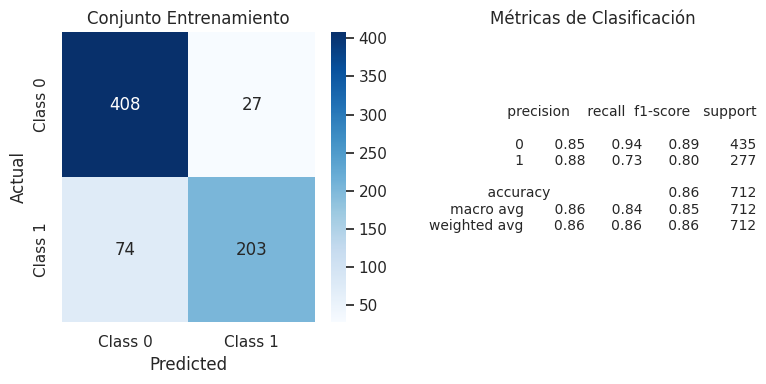

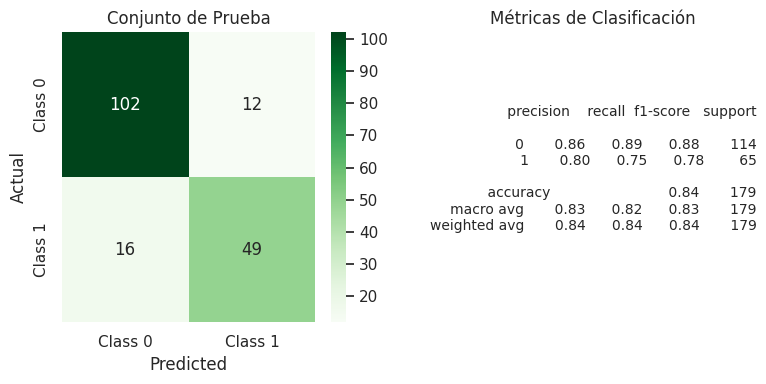

In [35]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrices_and_reports(y_pred_train_rf, y_pred_test_rf, y_train, y_test)

In [36]:
metrics_rf = compute_metrics(y_train, y_pred_train_rf, y_test, y_pred_test_rf, y_prob_train_dt)

<Figure size 1200x800 with 0 Axes>

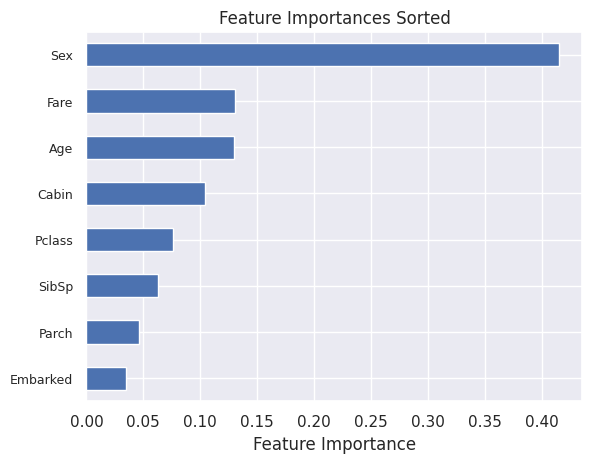

In [37]:
# Gráfico de las variables mas relevantes
df_imp_rf = pd.DataFrame(rf_model.feature_importances_.reshape(1,-1), 
                         columns=X_train.columns, 
                         index=["Feature Importances"])

# Transpose and sort by feature importance
df_imp_rf = df_imp_rf.T.sort_values(by="Feature Importances", ascending=True)

# Increase the figure size and reduce the font size for y-axis labels
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = df_imp_rf.plot.barh(legend=False)

# Set smaller font size for the y-axis labels
ax.set_yticklabels(df_imp_rf.index, fontsize=9)  # Adjust fontsize as needed

plt.xlabel('Feature Importance')
plt.title('Feature Importances Sorted')
plt.show()

## **Comparación Modelos**

Ahora, vamos a contruir un dataframe unificado con las metricas que hemos calculado y guardado para cada modelo con el fin de poder comparar:

In [38]:
# Creación de un dataframe unificado con las metricas de cada modelo construido
models_summary = pd.DataFrame({'Model':['Logistic Regression', 'Random Forest Clasiffier', 'Decision Tree'],
                            'Accuracy Train':[metrics_lr['accuracy_train'], metrics_rf['accuracy_train'], metrics_dt['accuracy_train']],
                            'Accuracy Test':[metrics_lr['accuracy_test'], metrics_rf['accuracy_test'], metrics_dt['accuracy_test']],
                            'precision_class_1':[metrics_lr['precision_class_1'], metrics_rf['precision_class_1'], metrics_dt['precision_class_1']],
                            'recall_class_1':[metrics_lr['recall_class_1'], metrics_rf['recall_class_1'], metrics_dt['recall_class_1']],
                            'f1_class_1':[metrics_lr['f1_class_1'], metrics_rf['f1_class_1'], metrics_dt['f1_class_1']]
                           })

models_summary.sort_values(by='recall_class_1', ascending=False)

,Model,Accuracy Train,Accuracy Test,precision_class_1,recall_class_1,f1_class_1
0,Logistic Regression,78.79,80.45,0.714,0.769,0.741
1,Random Forest Clasiffier,85.81,84.36,0.803,0.754,0.778
2,Decision Tree,83.57,84.36,0.803,0.754,0.778
